In [28]:
import pandas as pd
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

Load train and test data

In [3]:
X_train = pd.read_csv("../data/X_train_lstm.csv")
X_test = pd.read_csv("../data/X_test_lstm.csv")

Y_train = pd.read_csv("../data/Y_train_lstm.csv")
Y_test = pd.read_csv("../data/Y_test_lstm.csv")

Load LSTM model

In [5]:
lstm_model = keras.models.load_model("../models/lstm_model.keras")

In [6]:
Y_pred = lstm_model.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns)

3827/3827 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


MSE and MAE

In [7]:
mean_squared_error(Y_test, Y_pred)

358.6709611200713

In [8]:
mean_absolute_error(Y_test, Y_pred)  # mins

9.854460557376626

Standard deviation

In [9]:
for col in Y_pred.columns:
    print(col)
    print(Y_test[col].std(), Y_pred[col].std())

DELAY_DUE_CARRIER
25.567373882084624 6.4759521484375
DELAY_DUE_WEATHER
11.406046218761714 0.791070282459259
DELAY_DUE_SECURITY
2.422932730882158 0.04809405654668808
DELAY_DUE_NAS
19.65953564135109 11.401325225830078
DELAY_DUE_LATE_AIRCRAFT
29.452996135810928 8.593396186828613


Mean of predictions

In [10]:
Y_pred.mean()

DELAY_DUE_CARRIER          15.347479
DELAY_DUE_WEATHER           1.726623
DELAY_DUE_SECURITY          0.073125
DELAY_DUE_NAS              12.568697
DELAY_DUE_LATE_AIRCRAFT    18.048422
dtype: float32

### Plot box plots of predicted test labels and true labels

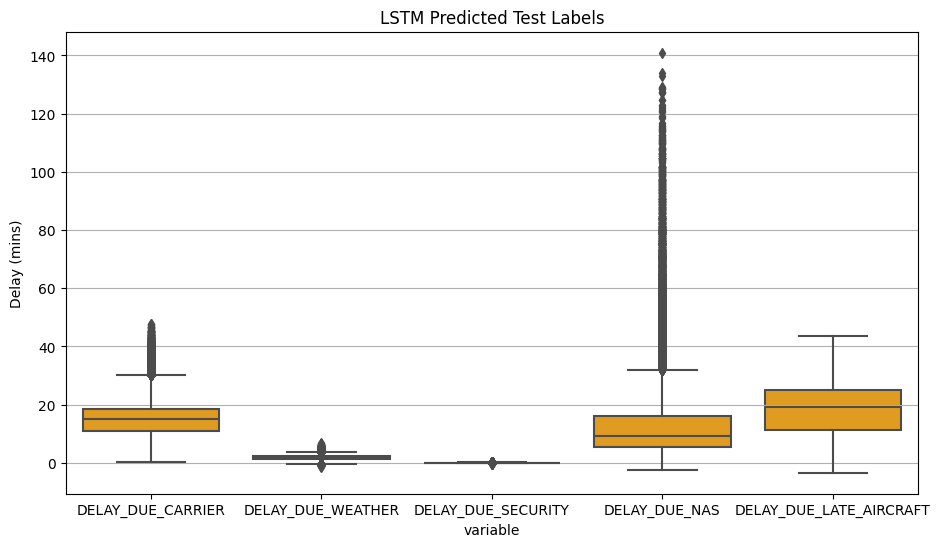

In [11]:
plt.figure(figsize=(11, 6))
plt.grid()
sns.boxplot(Y_pred.melt(), x="variable", y="value", color="orange")
plt.title('LSTM Predicted Test Labels')
plt.ylabel("Delay (mins)")
plt.show()

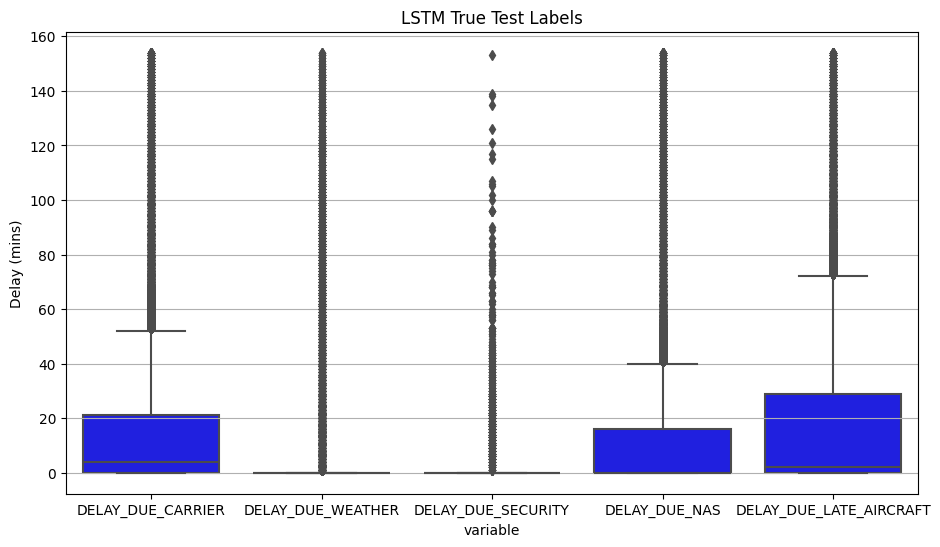

In [17]:
plt.figure(figsize=(11, 6))
plt.grid()
sns.boxplot(Y_test.melt(), x="variable", y="value", color="blue")
plt.title('LSTM True Test Labels')
plt.ylabel("Delay (mins)")
plt.show()

In [26]:
hybrid_model = keras.models.load_model("../models/hybrid_model.keras")

In [33]:
plot_model(hybrid_model,to_file="hybrid_model_architecture.png", show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [34]:
Y_pred = hybrid_model.predict(X_test)

3827/3827 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step


In [35]:
mean_squared_error(Y_test, Y_pred)

375.7390716937697

In [36]:
mean_absolute_error(Y_test, Y_pred)

9.817848793736191